# Predicting Age in Census Data<a href="#Predicting-Age-in-Census-Data" class="anchor-link"></a>

## Introduction<a href="#Introduction" class="anchor-link"></a>

The objective of this toy project is to predict the age of an individual
with the 1994 US Census Data using multiple linear regression. We use
the `Statsmodels` and `Patsy` modules for this task with Pyhon version
\>= 3.6. The dataset was sourced from the UCI Machine Learning
Repository at <https://archive.ics.uci.edu/ml/datasets/adult> (Lichman,
2013).

This report is organized as follows:

-   [Overview](#Overview) section describes the dataset used and the
    features in this dataset.
-   [Data Preparation](#Data-Preparation) section covers data cleaning
    and data preparation steps.
-   [Data Exploration](#Data-Exploration) section explores dataset
    features and their inter-relationships.
-   [Statistical Modeling and Performance
    Evaluation](#Statistical-Modeling-and-Performance-Evaluation)
    section first fits a full multiple linear regression model and
    performs diagnostic checks. Next, we perform backwards variable
    selection using p-values to obtain a reduced model, after which we
    perform another set of diagnostic checks on the reduced model.
-   [Summary and Conclusions](#Summary-and-Conclusions) section provides
    a summary of our work and presents our findings.

## Overview<a href="#Overview" class="anchor-link"></a>

### Data Source<a href="#Data-Source" class="anchor-link"></a>

The UCI Machine Learning Repository provides five datasets, but only
`adult.data`, `adult.test`, and `adult.names` were useful in this
project. The `adult.data` and `adult.test` are the training and test
datasets respectively. The `adult.names` file contains the details of
the variables (a.k.a. features or attributes). The training dataset has
32,561 observations (a.k.a. instances or records) and the test dataset
has 16,281 observations. Both datasets consist of 14 descriptive (a.k.a.
independent) features and one target (a.k.a. response or dependent)
feature. In this project, we combine both training and test data into
one.

### Project Objective<a href="#Project-Objective" class="anchor-link"></a>

Our goal is to see if we can predict an individual's age within an
acceptable margin of error using multiple linear regression primarily
with just main affects.

### Target Feature<a href="#Target-Feature" class="anchor-link"></a>

Our target feature is `age`, which is a continuous numerical feature.
Hence, our project is on a regression problem.

### Descriptive Features<a href="#Descriptive-Features" class="anchor-link"></a>

The variable descriptions below are from the `adult.names` file:

-   **`workclass`**: Private, Self-emp-not-inc, Self-emp-inc,
    Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
-   **`fnlwgt`**: continuous.
-   **`education`**: Bachelors, Some-college, 11th, HS-grad,
    Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
    1st-4th, 10th, Doctorate, 5th-6th, Preschool.
-   **`education-num`**: continuous.
-   **`marital-status`**: Married-civ-spouse, Divorced, Never-married,
    Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
-   **`occupation`**: Tech-support, Craft-repair, Other-service, Sales,
    Exec-managerial, Prof-specialty, Handlers-cleaners,
    Machine-op-\*inspct, Adm-clerical, Farming-fishing,
    Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
-   **`relationship`**: Wife, Own-child, Husband, Not-in-family,
    Other-relative, Unmarried.
-   **`race`**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other,
    Black.
-   **`sex`**: Female, Male.
-   **`capital-gain`**: continuous.
-   **`capital-loss`**: continuous.
-   **`hours-per-week`**: continuous.
-   **`native-country`**: United-States, Cambodia, England, Puerto-Rico,
    Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece,
    South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland,
    Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
    Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
    Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador,
    Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
-   **`income`**: binary, 1: earns over \\$50k a year, 0: earns less
    than \\$50k a year.

Most of the descriptive features are self-explanatory, except `fnlwgt`
which stands for "Final Weight" defined by the US Census. This weight is
an "estimate of the number of units in the target population that the
responding unit represents" (Lichman, 2013). This feature aims to
allocate similar weights to people with similar demographic
characteristics.

## Data Preparation<a href="#Data-Preparation" class="anchor-link"></a>

### Preliminaries<a href="#Preliminaries" class="anchor-link"></a>

For further information on how to prepare your data for statistical modeling, please refer to [this page](https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/)
on our website.

First, let's import all the common modules we will be using.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")

We read the training and test datasets directly from the data URLs.
Also, since the datasets do not contain the attribute names, they are
explicitly specified during data loading process. The `adultData`
dataset is read first and then it is concatenated with `adultTest` as
just `data`.

In [2]:
# Gettting data from the web
url = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)

# Specifying the attribute names
attributeNames = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

# Read in data
adultData = pd.read_csv(url[0], sep = ',', names = attributeNames, header = None)
adultTest = pd.read_csv(url[1] , sep = ',', names = attributeNames, skiprows = 1)

# Join the two datasets together
data = pd.concat([adultData,adultTest])

# we will not need the datasets below anymore, so let's delete them to save memory
del adultData, adultTest

# Display randomly selected 10 rows
data.sample(10, random_state=999)

age          workclass  fnlwgt      education  education-num  \
77      67                  ?  212759           10th              6   
30807   62   Self-emp-not-inc  224520        HS-grad              9   
23838   32            Private  262153        HS-grad              9   
24124   41            Private   39581   Some-college             10   
22731   66                  ?  186032      Assoc-voc             11   
2975    27            Private   37933   Some-college             10   
4457    31          State-gov   93589        HS-grad              9   
32318   34            Private  117963      Bachelors             13   
12685   61   Self-emp-not-inc  176965    Prof-school             15   
2183    47            Private  156926      Bachelors             13   

            marital-status        occupation    relationship    race      sex  \
77      Married-civ-spouse                 ?         Husband   White     Male   
30807   Married-civ-spouse             Sales         Husband   White     Male   
23838             Divorced      Craft-repair       Unmarried   White     Male   
24124             Divorced      Adm-clerical   Not-in-family   Black   Female   
22731              Widowed                 ?   Not-in-family   White   Female   
2975         Never-married      Adm-clerical       Unmarried   Black   Female   
4457              Divorced   Protective-serv       Own-child   Other     Male   
32318   Married-civ-spouse      Craft-repair         Husband   White     Male   
12685   Married-civ-spouse    Prof-specialty         Husband   White     Male   
2183    Married-civ-spouse    Prof-specialty         Husband   White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
77                0             0               2   United-States   <=50K  
30807             0             0              90   United-States    >50K  
23838             0             0              35   United-States   <=50K  
24124             0             0              24     El-Salvador   <=50K  
22731          2964             0              30   United-States   <=50K  
2975              0             0              40   United-States   <=50K  
4457              0             0              40   United-States   <=50K  
32318             0             0              40   United-States    >50K  
12685             0             0              50   United-States    >50K  
2183              0             0              40   United-States   >50K.

**Note**: Alternatively, you can download the datasets from UCI
Repository as `txt` files to your computer and then read them in as
below.

```python
    adultData = pd.read_csv('adult.data.txt', sep = ',', names = attributeNames, header = None)
    adultTest = pd.read_csv('adult.test.txt', sep = ',', names = attributeNames, skiprows = 1)
```

### Data Cleaning and Transformation<a href="#Data-Cleaning-and-Transformation" class="anchor-link"></a>

We first confirm that the feature types match the descriptions outlined
in the documentation.

In [3]:
print(f"Shape of the dataset is {data.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(data.dtypes)

Shape of the dataset is (48842, 15) 

Data types are below where 'object' indicates a string type: 
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


### Checking for Missing Values<a href="#Checking-for-Missing-Values" class="anchor-link">¶</a>

In [4]:
print(f"\nNumber of missing values for each feature:")
print(data.isnull().sum())


Number of missing values for each feature:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


On surface, no attribute contains any missing values, though we shall
see below that the missing values are coded with a question mark. We
will address this issue later.

### Summary Statistics<a href="#Summary-Statistics" class="anchor-link"></a>

In [5]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
data.describe(include='int64')

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [6]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
data.describe(include='object')

workclass education       marital-status       occupation relationship  \
count      48842     48842                48842            48842        48842   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       33906     15784                22379             6172        19716   

          race    sex  native-country  income  
count    48842  48842           48842   48842  
unique       5      2              42       4  
top      White   Male   United-States   <=50K  
freq     41762  32650           43832   24720

Table 2 shows the feature `income` has four categories (or a cardinality
of 4). It was supposed to be 2 since income must be binary. We shall
explain how to fix this cardinality issue later.

### Continuous Features<a href="#Continuous-Features" class="anchor-link">¶</a>

As discussed earlier, the `fnlwgt` variable has no predictive power, so
it is removed. In addition, since we have an education categorical
feature, we will go ahead and remove the `education-num` feature as it
relays the same information and therefore redundant.

In [7]:
data = data.drop(columns=['fnlwgt', 'education-num'])
data['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The range of `age` appears reasonable as the minimum and maximum ages
are 17 and 90 respectively.

Next, we define `capital = capital-gain - capital-loss` and then remove
the individual gain and loss variables. The summary statistic for
`capital` is displayed below.

In [8]:
data['capital'] = data['capital-gain'] - data['capital-loss']
data = data.drop(columns=['capital-gain', 'capital-loss'])
data['capital'].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital, dtype: float64

### Fixing Column Names<a href="#Fixing-Column-Names" class="anchor-link"></a>

Some column names contain a minus sign, which can be problematic when
modeling. Basically, when we write the regression formula, a minus sign
will mean "exclude this variable", which is clearly not our intent here.
For this reason, we modify the column names so that the minus signs are
replaced with an underscore sign.

In [9]:
data.columns = [colname.replace('-', '_') for colname in list(data.columns)]
data.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  income  capital  
0   United-States   <=50K     2174  
1   United-States   <=50K        0  
2   United-States   <=50K        0  
3   United-States   <=50K        0  
4            Cuba   <=50K        0

### Categorical Features<a href="#Categorical-Features" class="anchor-link"></a>

Let's have a look at the unique values of the categorical columns. In
`Pandas`, string types are of data type "object", and usually these
would be the categorical features.

In [10]:
categoricalColumns = data.columns[data.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(data[col].unique())
    print('')

Unique values for workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values for occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values for relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values for race
[' White' ' Black' ' Asian-Pac-Islander' ' Ame

Some categorical attributes contain excessive white spaces, which makes
life hard when filtering data. We will apply the `strip()` function to
remove extra white spaces.

In [11]:
for col in categoricalColumns:
    data[col] = data[col].str.strip()

**WARNING:** The `Statsmodels` module does not play nice when you have a
minus sign in levels of categorical variables, especially when you try
to some sort of automatic variable selection. The reason is that the
minus sign has a special meaning in the underlying `Patsy` module: it
means remove this feature. So, we will replace all the minus signs in
categorical variable level names with an underscore sign. In addition, a
dot sign is not allowed either.

In [12]:
for col in categoricalColumns:
    data[col] = data[col].str.replace('-', '_')
data.head()

age         workclass  education      marital_status         occupation  \
0   39         State_gov  Bachelors       Never_married       Adm_clerical   
1   50  Self_emp_not_inc  Bachelors  Married_civ_spouse    Exec_managerial   
2   38           Private    HS_grad            Divorced  Handlers_cleaners   
3   53           Private       11th  Married_civ_spouse  Handlers_cleaners   
4   28           Private  Bachelors  Married_civ_spouse     Prof_specialty   

    relationship   race     sex  hours_per_week native_country income  capital  
0  Not_in_family  White    Male              40  United_States  <=50K     2174  
1        Husband  White    Male              13  United_States  <=50K        0  
2  Not_in_family  White    Male              40  United_States  <=50K        0  
3        Husband  Black    Male              40  United_States  <=50K        0  
4           Wife  Black  Female              40           Cuba  <=50K        0

The `workclass`, `occupation`, and `native-country` features contain
some missing values encoded as "?". These observations comprise 7.4% of
the total number of observations.

In [13]:
mask = (data['workclass'] == '?') | (data['occupation'] == '?') | (data['native_country'] == '?')
mask.value_counts(normalize = True)*100

False    92.588346
True      7.411654
Name: proportion, dtype: float64

We now remove the rows with missing occupation, workclass, and
native-country where missing values are encoded as "?".

In [14]:
data = data[data['workclass'] != "?"] 
data = data[data['occupation'] != "?"] 
data = data[data['native_country'] != "?"]

Since `native-country` is too granular and unbalanced, we group
countries as "Other" and "United_States". Likewise, we also categorize
races as "Other" and "White".

In [15]:
data.loc[data['native_country'] != 'United_States', 'native_country'] = 'Other'
data.loc[data['race'] != 'White', 'race'] = 'Other'

**TIP 1**: As a general comment, sometimes numerical features in a
dataset actually represent categorical features. As an example, suppose
each state of Australia is encoded as an integer between 1 and 8, say as
`StateID` column in a dataframe called `df`. This would still be a
categorical variable. For your code to work correctly in such cases, you
need to change the data type of this column from numeric to string as
follows:

```python
    df['StateID'] = df['StateID'].astype(str)
```

**TIP 2**: If you have a string column, say named `col`, that is
actually real-valued, you can change its data type as follows:

```python
    df['col'] = df['col'].astype(float)
```

### Dependent Variable<a href="#Dependent-Variable" class="anchor-link"></a>

We need to correct the levels of the `income` categorical feature, which
is our dependent variable, to make sure it is binary.

In [16]:
print('Before correction, the number of unique income labels are: ')
print(data['income'].value_counts())
print("")

data['income'] = data['income'].str.rstrip(".")

print('After removing the dot, the number of unique income labels are: ')
print(data['income'].value_counts())
print("")

Before correction, the number of unique income labels are: 
income
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: count, dtype: int64

After removing the dot, the number of unique income labels are: 
income
<=50K    34014
>50K     11208
Name: count, dtype: int64



**WARNING:** The `Statsmodels` module does not play nice when you have
mathematical symbols such as "-", "+", "\<" and "\>" in levels of
categorical variables (try it and you will get a syntax error). For this
reason, we will re-code income as `low` and `high` as below using the
`replace()` function in `Pandas`.

In [17]:
data['income'] = data['income'].replace({'<=50K': 'low', '>50K': 'high'})
data['income'].value_counts()

income
low     34014
high    11208
Name: count, dtype: int64

## Data Exploration<a href="#Data-Exploration" class="anchor-link"></a>

Our dataset can now be considered "clean" and ready for visualisation
and statistical modeling.

### Univariate Visualisation<a href="#Univariate-Visualisation" class="anchor-link"></a>

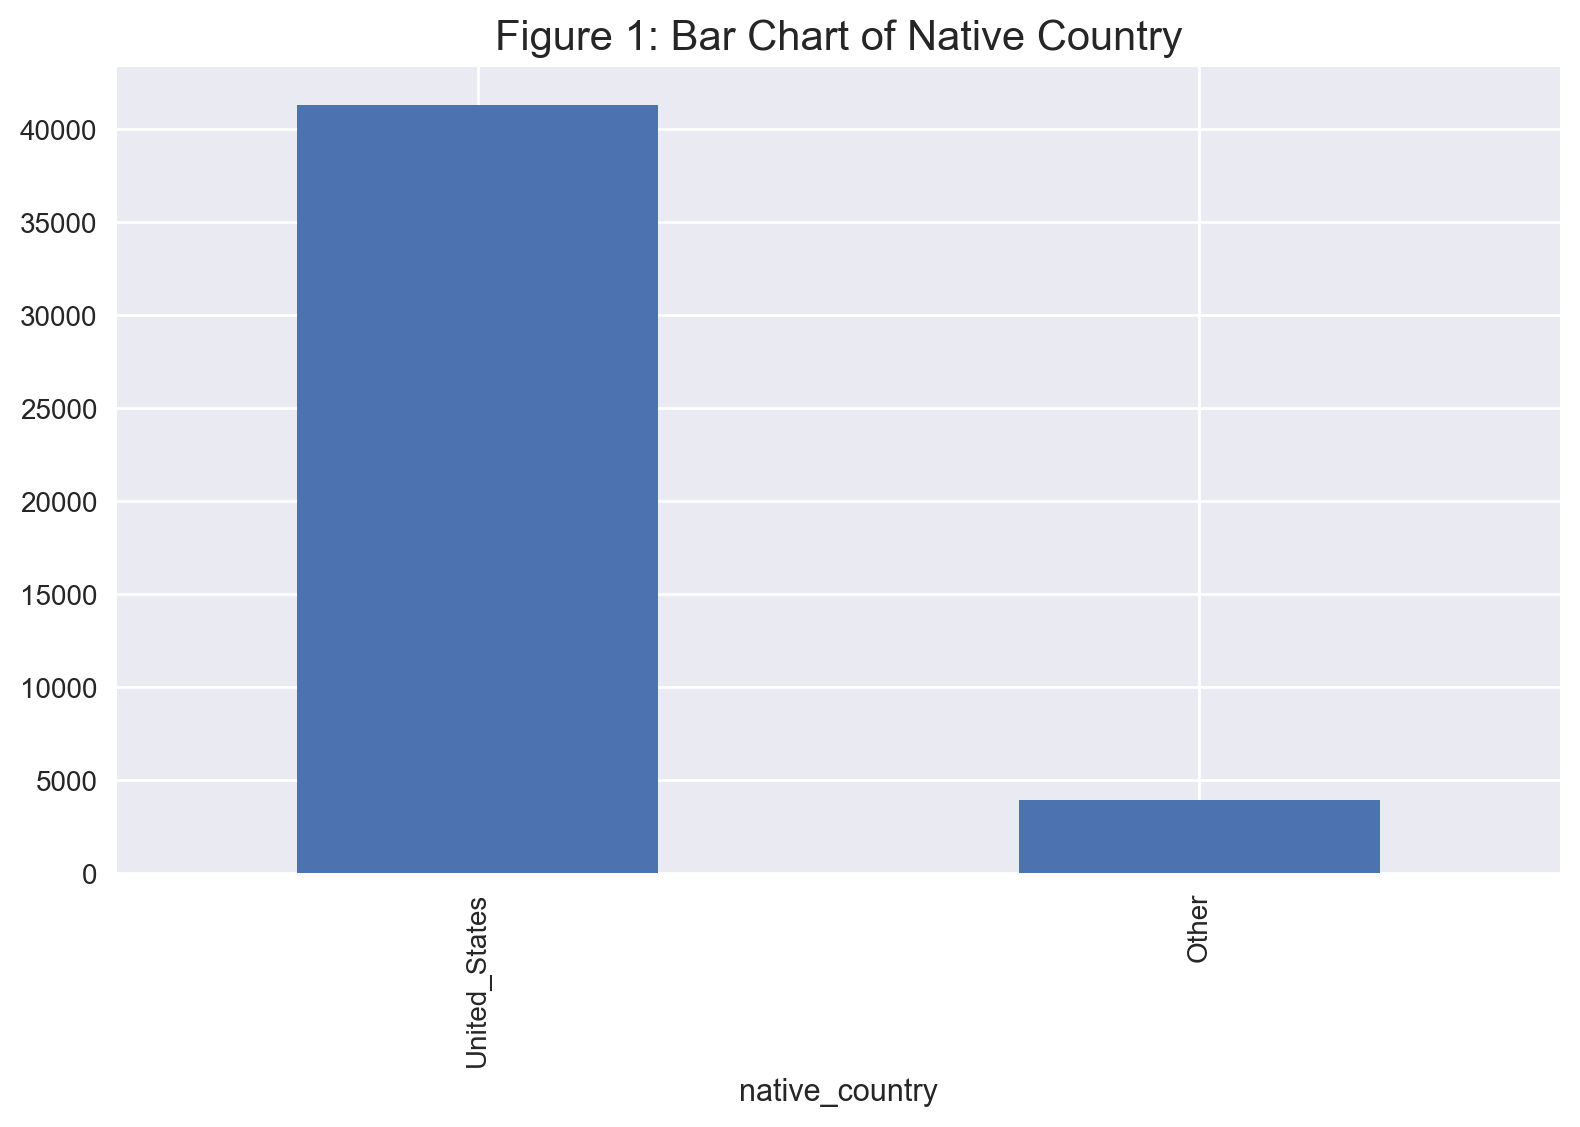

In [18]:
ax = data['native_country'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Native Country', fontsize = 15)
plt.show();

Let's display a boxplot and histogram for `age`. Figure 2 shows that
this variable is right-skewed.

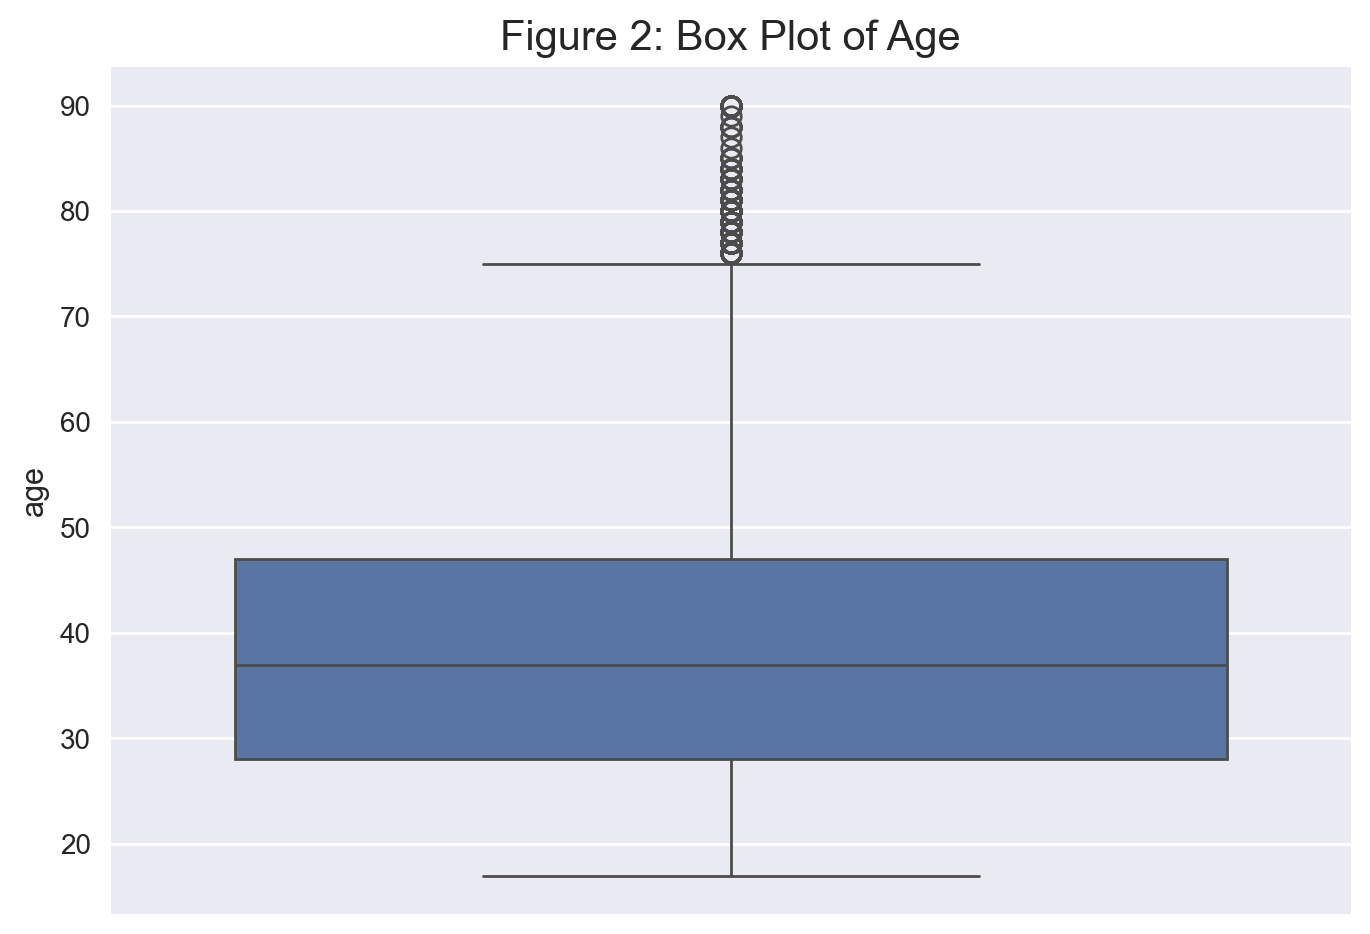

In [19]:
# get a box plot of age
sns.boxplot(data['age']).set_title('Figure 2: Box Plot of Age', fontsize = 15)
plt.show();

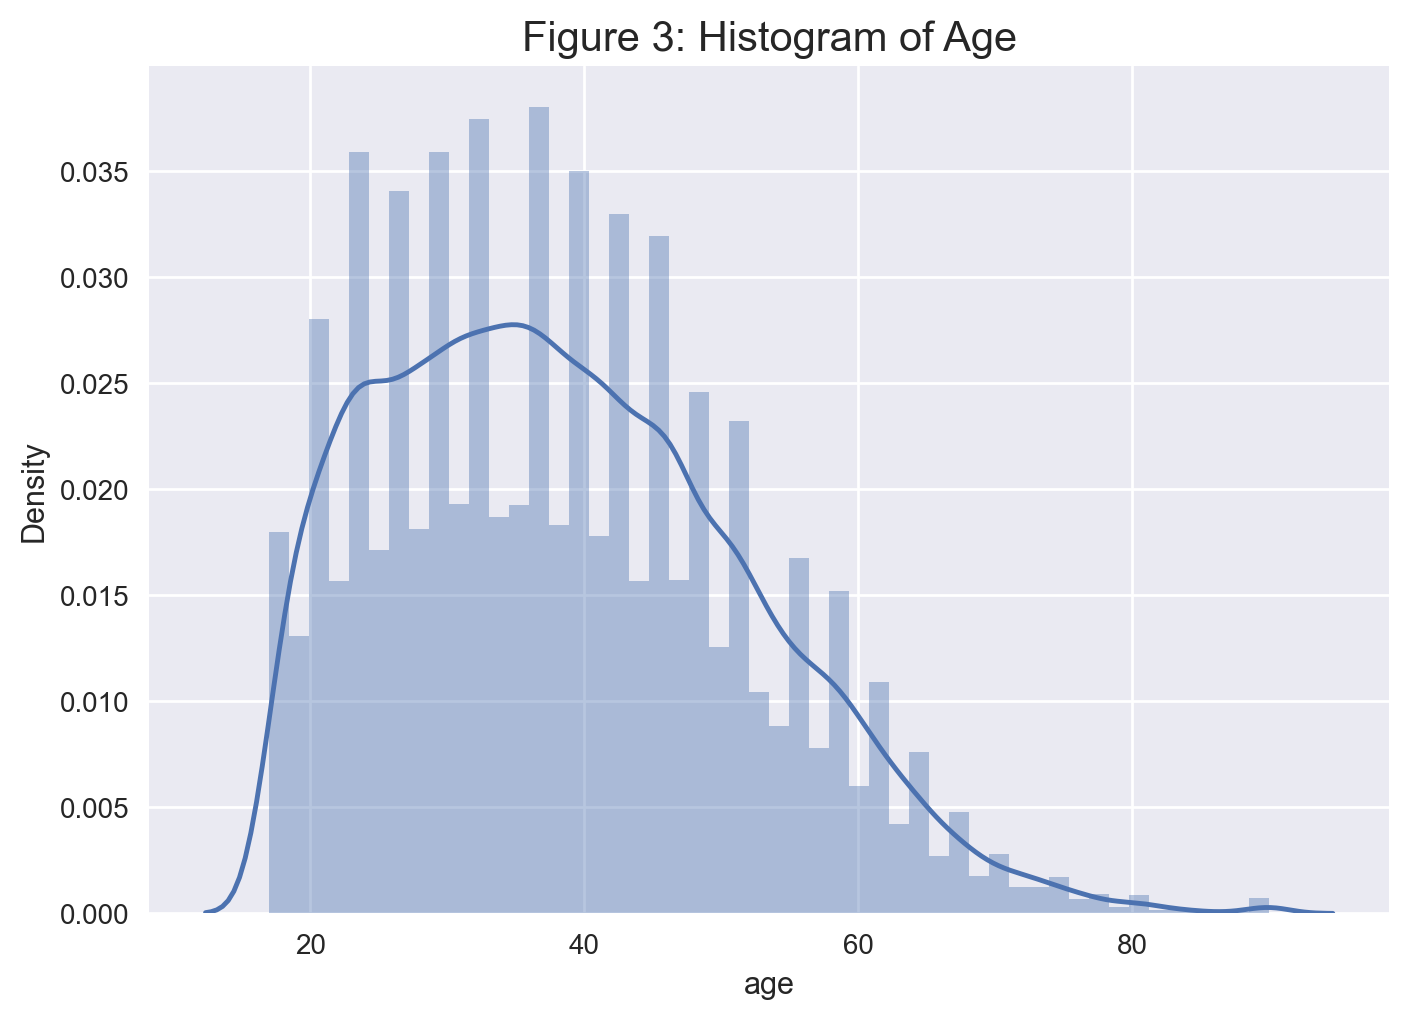

In [20]:
# get a histogram of age with kernel density estimate
sns.distplot(data['age'], kde = True).set_title('Figure 3: Histogram of Age', fontsize = 15)
plt.show();

### Multivariate Visualisation<a href="#Multivariate-Visualisation" class="anchor-link"></a>

#### Scatterplot of Numeric Features and Age<a href="#Scatterplot-of-Numeric-Features-and-Age" class="anchor-link"></a>

The scatterplot in Figure 4 shows no clear correlation between the age
and hours_per_week numeric variables.

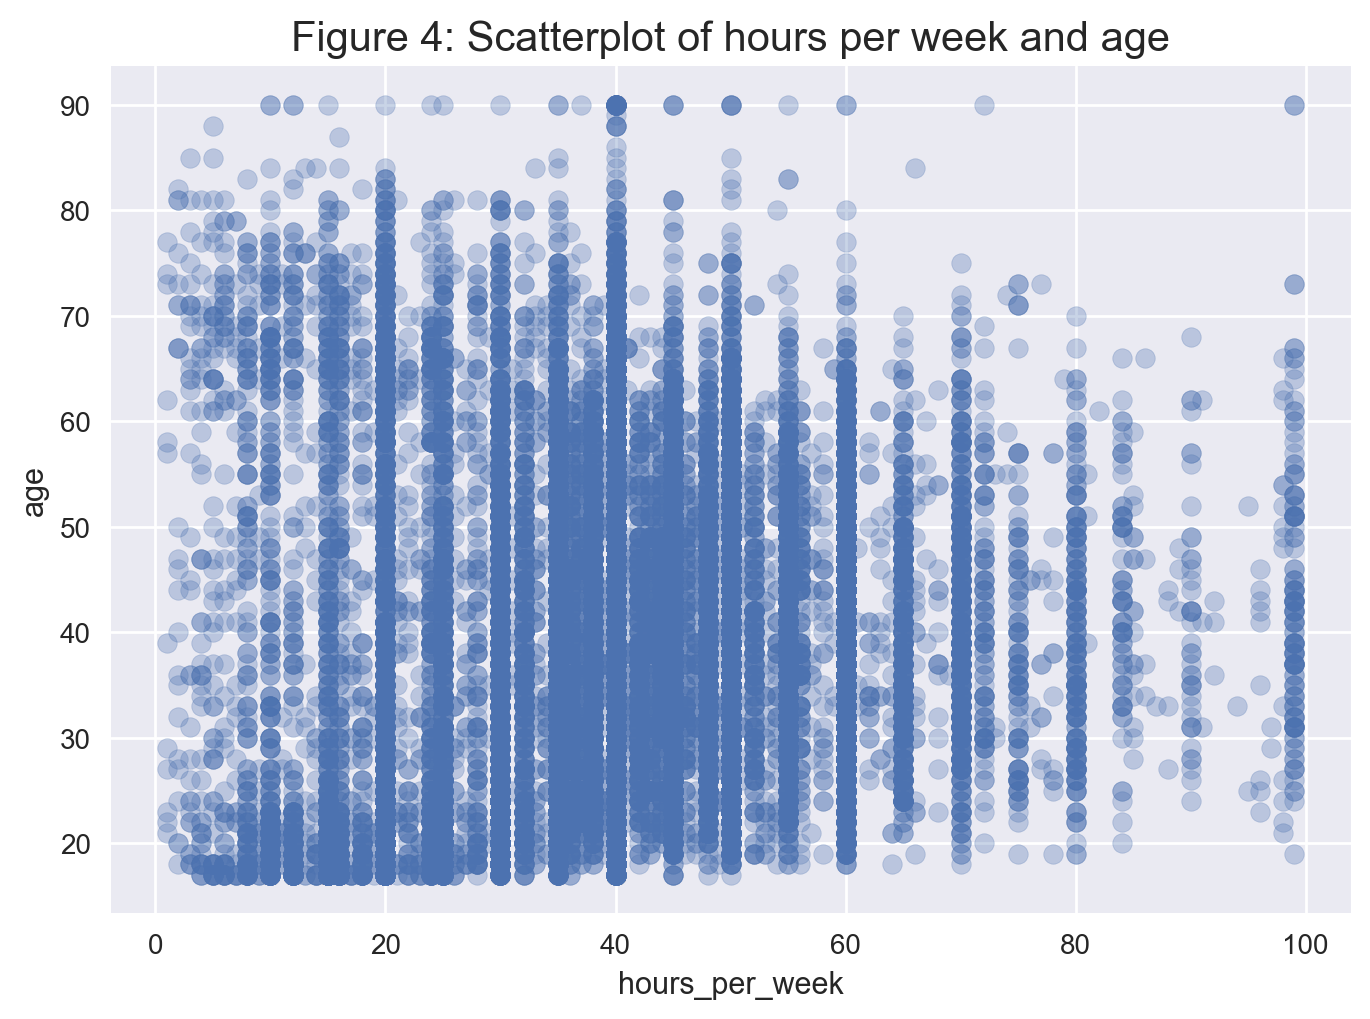

In [21]:
# store the values of hours-per-week
hpw = data['hours_per_week']

# get a scatter plot
plt.scatter(hpw, data['age'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of hours per week and age', fontsize = 15)
plt.xlabel('hours_per_week')
plt.ylabel('age')
plt.show();

#### Categorical Attributes by Age<a href="#Categorical-Attributes-by-Age" class="anchor-link"></a>

We can see that the distribution of age between each gender is similar.

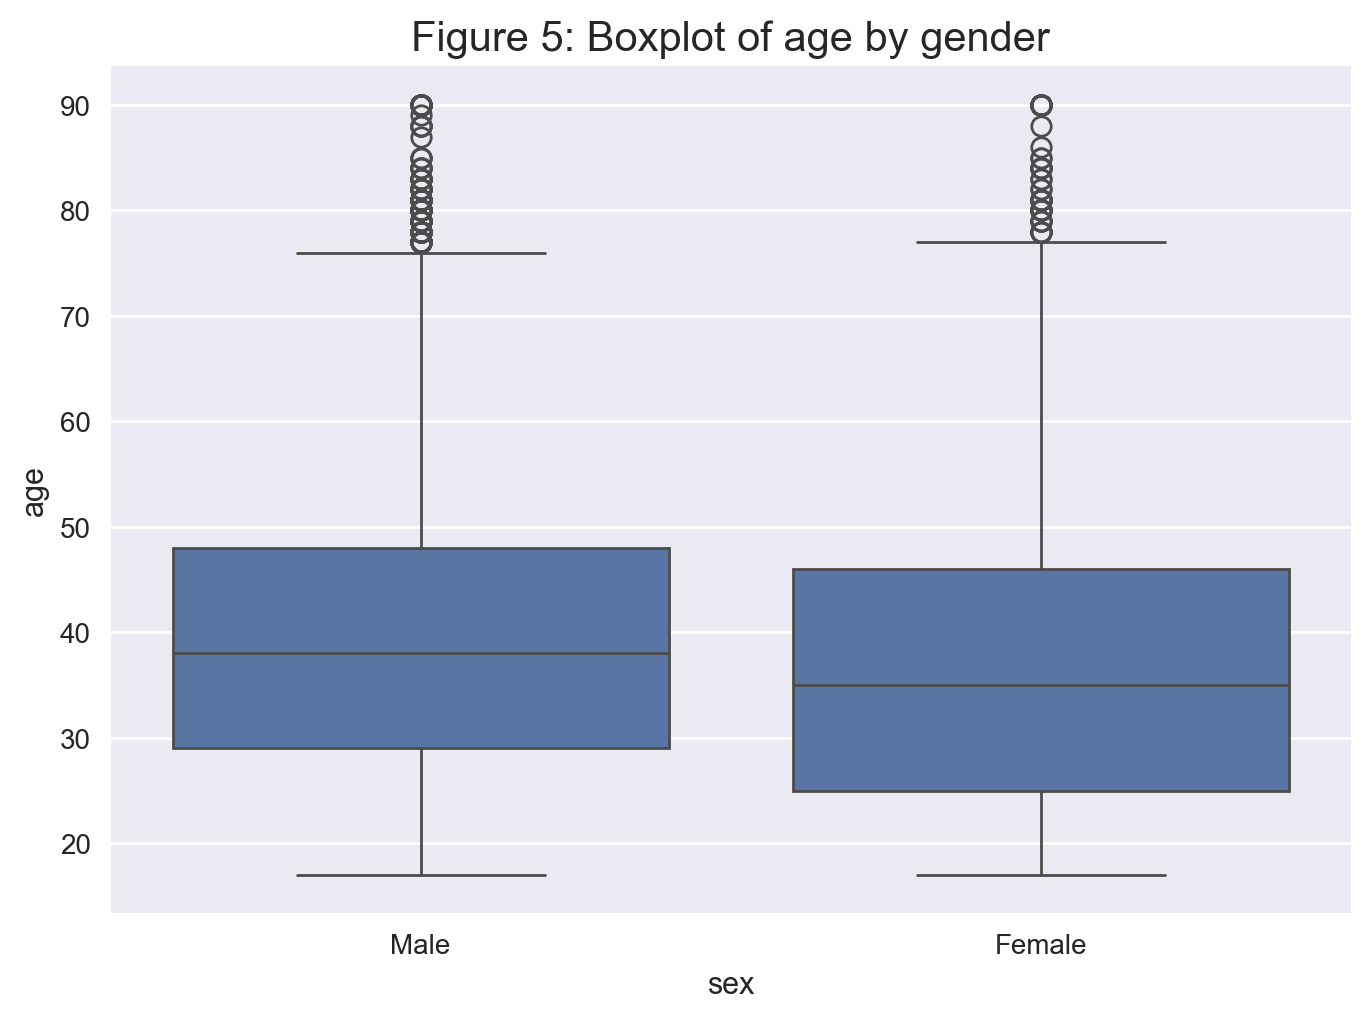

In [22]:
# Creating a boxplot
sns.boxplot(x='sex', y='age', data=data);
plt.title('Figure 5: Boxplot of age by gender', fontsize = 15)
plt.show();

The distribution of married women and single women differ but have a
similar median as seen in Figure 6. The whiskers suggest that women
above the age of 70 are more likely to be single.

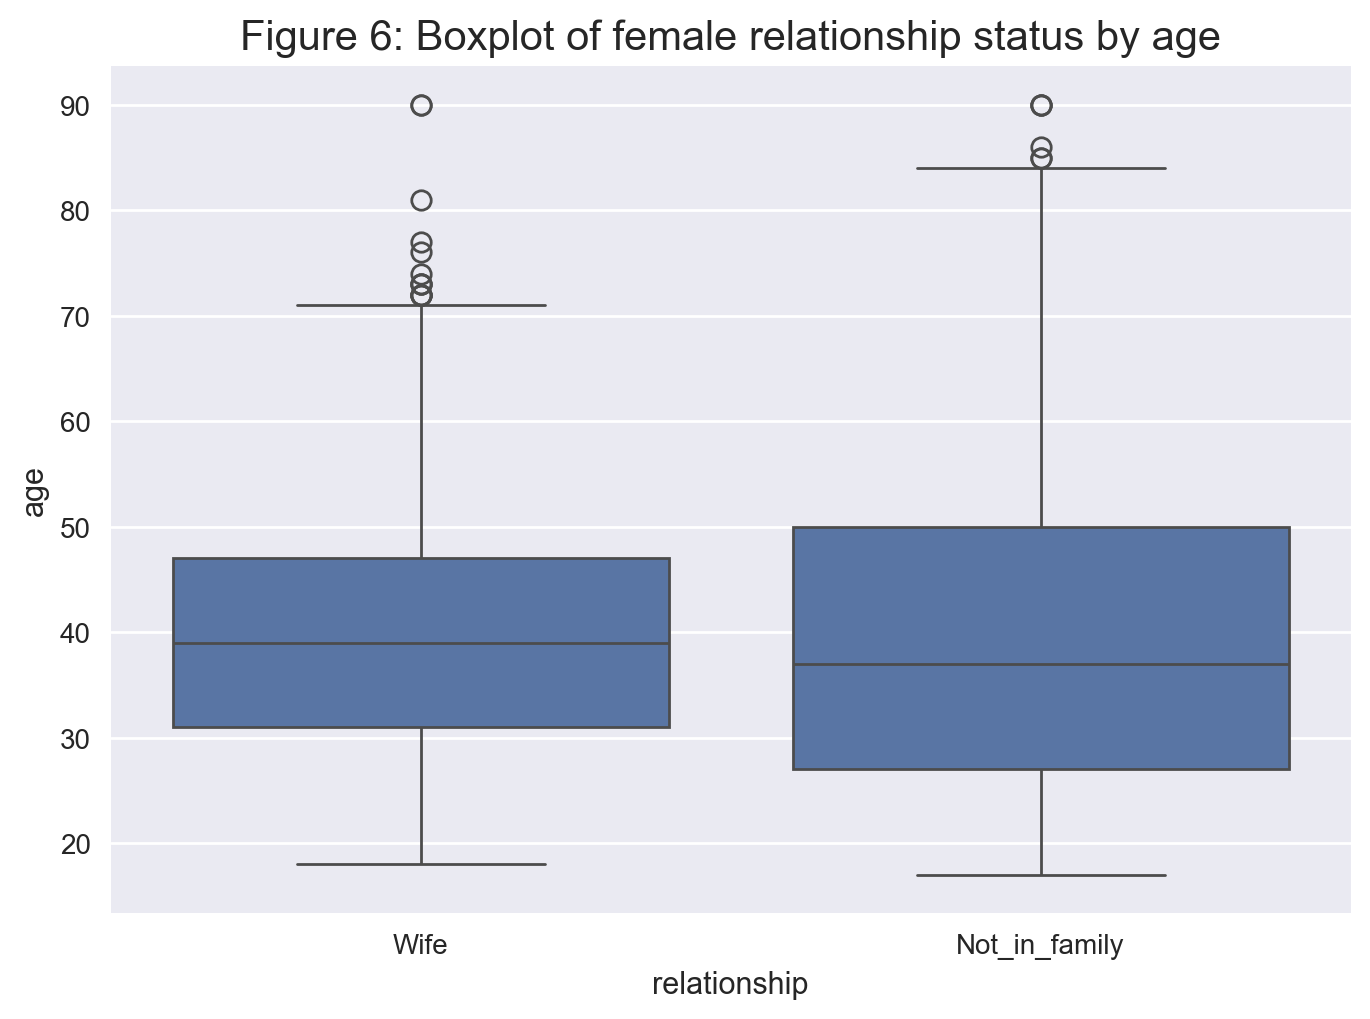

In [23]:
# Storing a list of booleans corresponding to whether the person is female and a wife or Not_in_family
family_female_mask = (data['relationship'].isin(['Not_in_family','Wife'])) & (data['sex'].isin(['Female']))

# Using the list of booleans previously found to select the index of rows
family_female = data[family_female_mask]

# Creating the boxplot
sns.boxplot(x='relationship', y='age', data=family_female);
plt.title('Figure 6: Boxplot of female relationship status by age', fontsize = 15)
plt.show();

#### Facet plots<a href="#Facet-plots" class="anchor-link"></a>

From Figure 7, we see that generally the distribution of male bachelors
and high school graduates is somewhat comparable within each
relationship level.

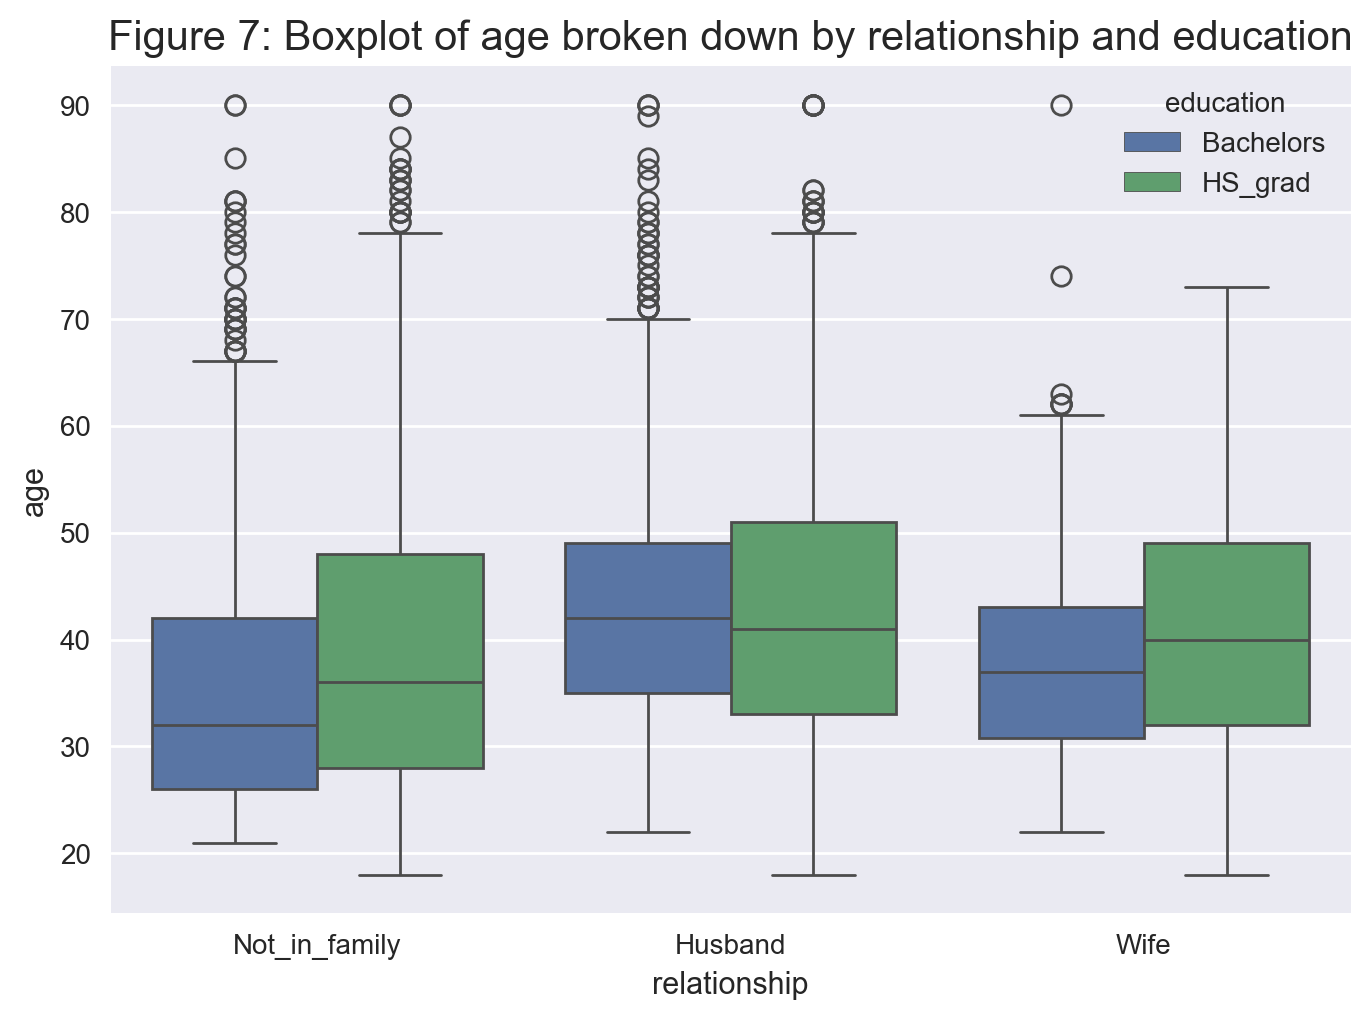

In [24]:
# Getting the index of those who have completed their Bachelors or HS graduate
edu_mask = data['education'].isin(['Bachelors','HS_grad'])

# Getting the index of those who are male and Not_in_family or a Husband
family_male_mask = (data['relationship'].isin(['Not_in_family','Husband'])) & (data['sex'].isin(['Male']))

# Selecting the rows of those who are Not_in_family, husband or wife and 
# have completed either a Bachelors or just graduated high school
education_relationship = data[(edu_mask & family_female_mask) | (edu_mask & family_male_mask)]

# Creating the boxplot
sns.boxplot(x='relationship', y='age', hue='education', data=education_relationship);
plt.title('Figure 7: Boxplot of age broken down by relationship and education', fontsize = 15)
plt.show();

Although there is no clear overall pattern, we observe in Figure 8 that
no government worker under the age of 40 earns over \\\$50k a year
unless they work more than 20 hours a week.

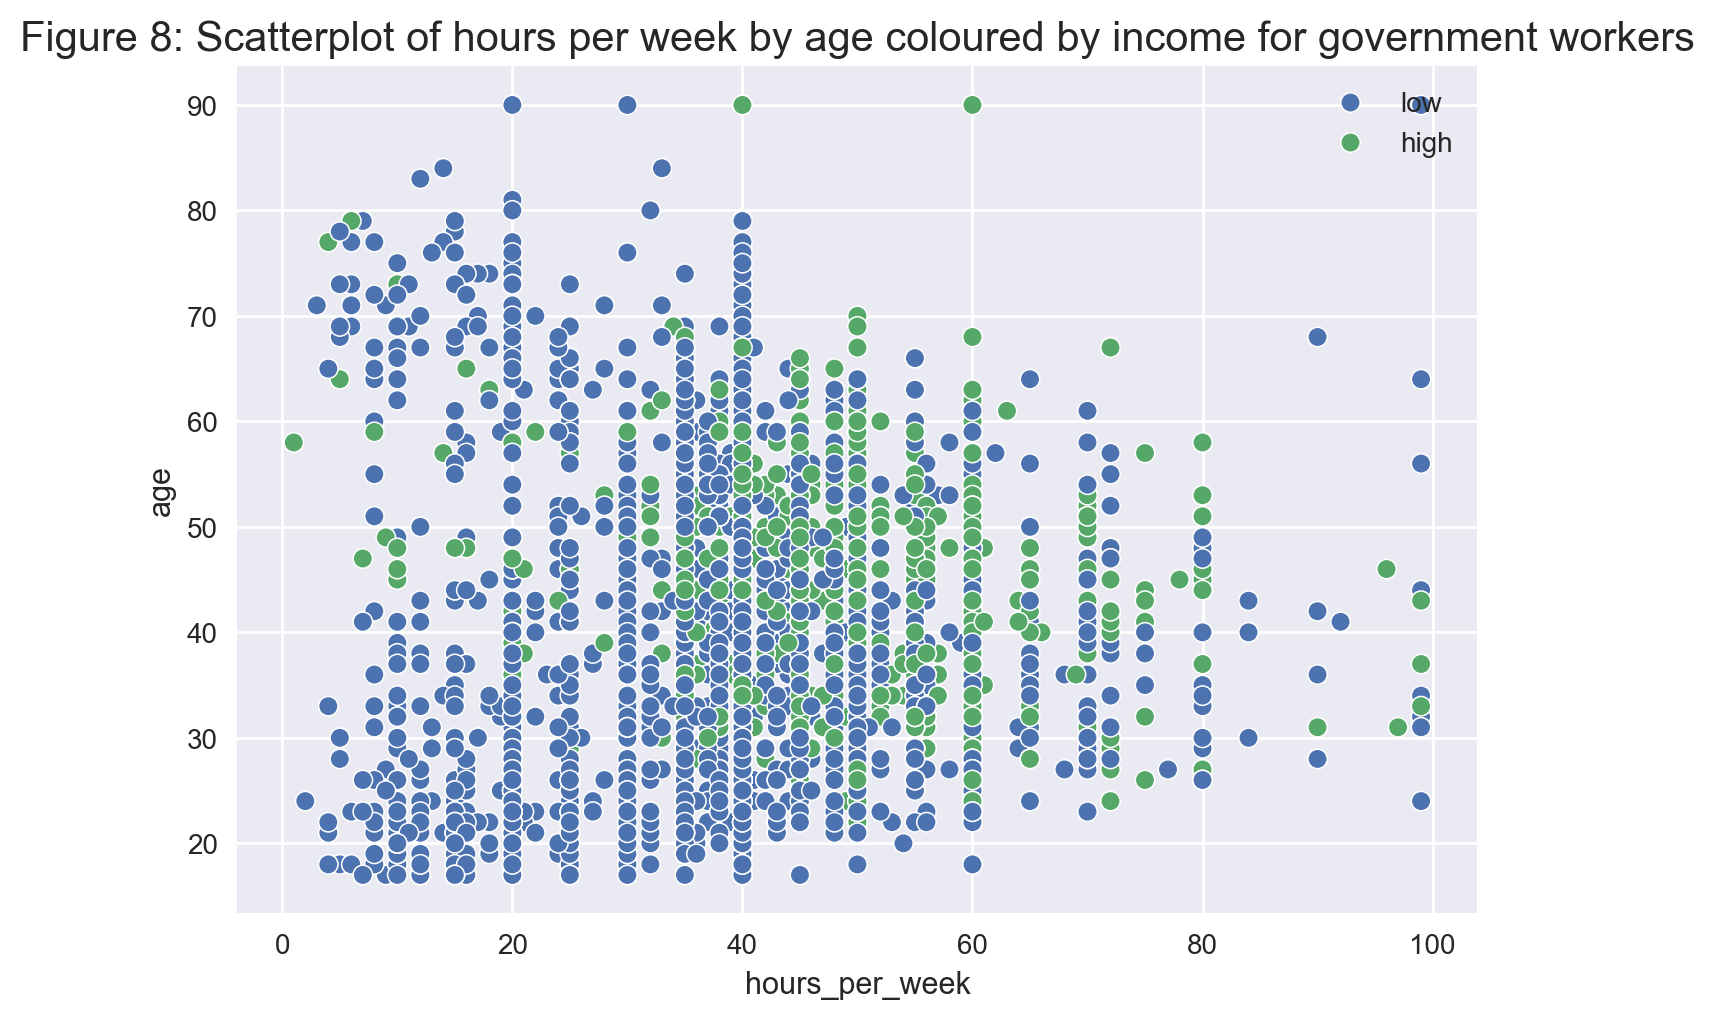

In [25]:
# Getting the index of those who work in the government
gov_mask = data['workclass'].isin(['Federal_gov','Local_gov','State_gov'])

# creating a dataframe of those who work in the government
gov = data[gov_mask]

# creating a scatterplot
sns.scatterplot(x='hours_per_week', y='age', hue='income', data=gov)
plt.title('Figure 8: Scatterplot of hours per week by age coloured by income for government workers', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Statistical Modeling and Performance Evaluation<a href="#Statistical-Modeling-and-Performance-Evaluation" class="anchor-link"></a>

### Full Model<a href="#Full-Model" class="anchor-link"></a>

We begin by fitting a multiple linear regression that predicts `age`
using all of the available features. We call this the full model. First
let's take a quick peak at the clean data.

In [26]:
data.head()

age         workclass  education      marital_status         occupation  \
0   39         State_gov  Bachelors       Never_married       Adm_clerical   
1   50  Self_emp_not_inc  Bachelors  Married_civ_spouse    Exec_managerial   
2   38           Private    HS_grad            Divorced  Handlers_cleaners   
3   53           Private       11th  Married_civ_spouse  Handlers_cleaners   
4   28           Private  Bachelors  Married_civ_spouse     Prof_specialty   

    relationship   race     sex  hours_per_week native_country income  capital  
0  Not_in_family  White    Male              40  United_States    low     2174  
1        Husband  White    Male              13  United_States    low        0  
2  Not_in_family  White    Male              40  United_States    low        0  
3        Husband  Other    Male              40  United_States    low        0  
4           Wife  Other  Female              40          Other    low        0

When constructing the regression formula, we can manually add all the
independent features. On the other hand, if there are lots of
independent variables, we can get smart and use some string function
tricks as below.

In [27]:
# short and sweet
formula_string_indep_vars = ' + '.join(data.drop(columns='age').columns)
formula_string = 'age ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  age ~ workclass + education + marital_status + occupation + relationship + race + sex + hours_per_week + native_country + income + capital


The formula string above works just fine with the `Statsmodels` module.
The problem, however, is that we cannot do automatic variable selection
with this formula. What we need for this purpose is "one-hot-encoding"
of categorical features. For more information on this encoding, please
refer to [this
page](https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/).

In the code chunk below, we first use the `get_dummies()` function in
`Pandas` for one-hot-encoding of categorical features and then we
construct a new formula string with the encoded features.

In [28]:
# one-hot-encoding of categorical features
# for this to work correctly, variable data types (numeric or categorical)
# must be correctly specified within the Pandas dataframe
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

age  hours_per_week  capital  workclass_Local_gov  workclass_Private  \
0   39              40     2174                False              False   
1   50              13        0                False              False   
2   38              40        0                False               True   
3   53              40        0                False               True   
4   28              40        0                False               True   

   workclass_Self_emp_inc  workclass_Self_emp_not_inc  workclass_State_gov  \
0                   False                       False                 True   
1                   False                        True                False   
2                   False                       False                False   
3                   False                       False                False   
4                   False                       False                False   

   workclass_Without_pay  education_11th  ...  occupation_Transport_moving  \
0                  False           False  ...                        False   
1                  False           False  ...                        False   
2                  False           False  ...                        False   
3                  False            True  ...                        False   
4                  False           False  ...                        False   

   relationship_Not_in_family  relationship_Other_relative  \
0                        True                        False   
1                       False                        False   
2                        True                        False   
3                       False                        False   
4                       False                        False   

   relationship_Own_child  relationship_Unmarried  relationship_Wife  \
0                   False                   False              False   
1                   False                   False              False   
2                   False                   False              False   
3                   False                   False              False   
4                   False                   False               True   

   race_White  sex_Male  native_country_United_States  income_low  
0        True      True                          True        True  
1        True      True                          True        True  
2        True      True                          True        True  
3       False      True                          True        True  
4       False     False                         False        True  

[5 rows x 52 columns]

In [29]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='age').columns)
formula_string_encoded = 'age ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  age ~ hours_per_week + capital + workclass_Local_gov + workclass_Private + workclass_Self_emp_inc + workclass_Self_emp_not_inc + workclass_State_gov + workclass_Without_pay + education_11th + education_12th + education_1st_4th + education_5th_6th + education_7th_8th + education_9th + education_Assoc_acdm + education_Assoc_voc + education_Bachelors + education_Doctorate + education_HS_grad + education_Masters + education_Preschool + education_Prof_school + education_Some_college + marital_status_Married_AF_spouse + marital_status_Married_civ_spouse + marital_status_Married_spouse_absent + marital_status_Never_married + marital_status_Separated + marital_status_Widowed + occupation_Armed_Forces + occupation_Craft_repair + occupation_Exec_managerial + occupation_Farming_fishing + occupation_Handlers_cleaners + occupation_Machine_op_inspct + occupation_Other_service + occupation_Priv_house_serv + occupation_Prof_specialty + occupation_Protective_serv + occupation_S

For fun, let's add two interaction terms to our full model. Let's add
the interaction of the `capital` feature with `hours_per_week` and
`race_White` respectively.

In [30]:
formula_string_encoded = formula_string_encoded + ' + hours_per_week:capital + race_White:capital'

Also, let's add the square of the `hours_per_week` feature to illustrate
how we can add higher order terms to our linear regression.

In [31]:
formula_string_encoded = formula_string_encoded + ' + np.power(hours_per_week, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  age ~ hours_per_week + capital + workclass_Local_gov + workclass_Private + workclass_Self_emp_inc + workclass_Self_emp_not_inc + workclass_State_gov + workclass_Without_pay + education_11th + education_12th + education_1st_4th + education_5th_6th + education_7th_8th + education_9th + education_Assoc_acdm + education_Assoc_voc + education_Bachelors + education_Doctorate + education_HS_grad + education_Masters + education_Preschool + education_Prof_school + education_Some_college + marital_status_Married_AF_spouse + marital_status_Married_civ_spouse + marital_status_Married_spouse_absent + marital_status_Never_married + marital_status_Separated + marital_status_Widowed + occupation_Armed_Forces + occupation_Craft_repair + occupation_Exec_managerial + occupation_Farming_fishing + occupation_Handlers_cleaners + occupation_Machine_op_inspct + occupation_Other_service + occupation_Priv_house_serv + occupation_Prof_specialty + occupation_Protective_serv + occupation_S

Now that we have defined our statistical model formula as a Python
string, we fit an OLS (ordinary least squares) model to our encoded
data.

In [32]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     571.3
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:54:41   Log-Likelihood:            -1.6914e+05
No. Observations:               45222   AIC:                         3.384e+05
Df Residuals:                   45167   BIC:                         3.389e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

The full model has an adjusted R-squared value of 0.405, which means
that only 40% of the variance is explained by the model. By looking at
the p-values, we observe that the majority of them are highly
significant, though there are a few insignificant variables at a 5%
level.

Let's define a new data frame for actual age vs. predicted age and the
residuals for the full model. We will use this data frame when plotting
predicted values and the regression residuals.

In [33]:
residuals_full = pd.DataFrame({'actual': data_encoded['age'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

actual  predicted   residual
0      39  32.570133   6.429867
1      50  49.455511   0.544489
2      38  41.508711  -3.508711
3      53  37.683573  15.316427
4      28  36.097893  -8.097893
5      37  40.570690  -3.570690
6      49  44.495664   4.504336
7      52  49.611524   2.388476
8      31  35.683539  -4.683539
9      42  44.318118  -2.318118

Let's plot actual age values vs. predicted values.

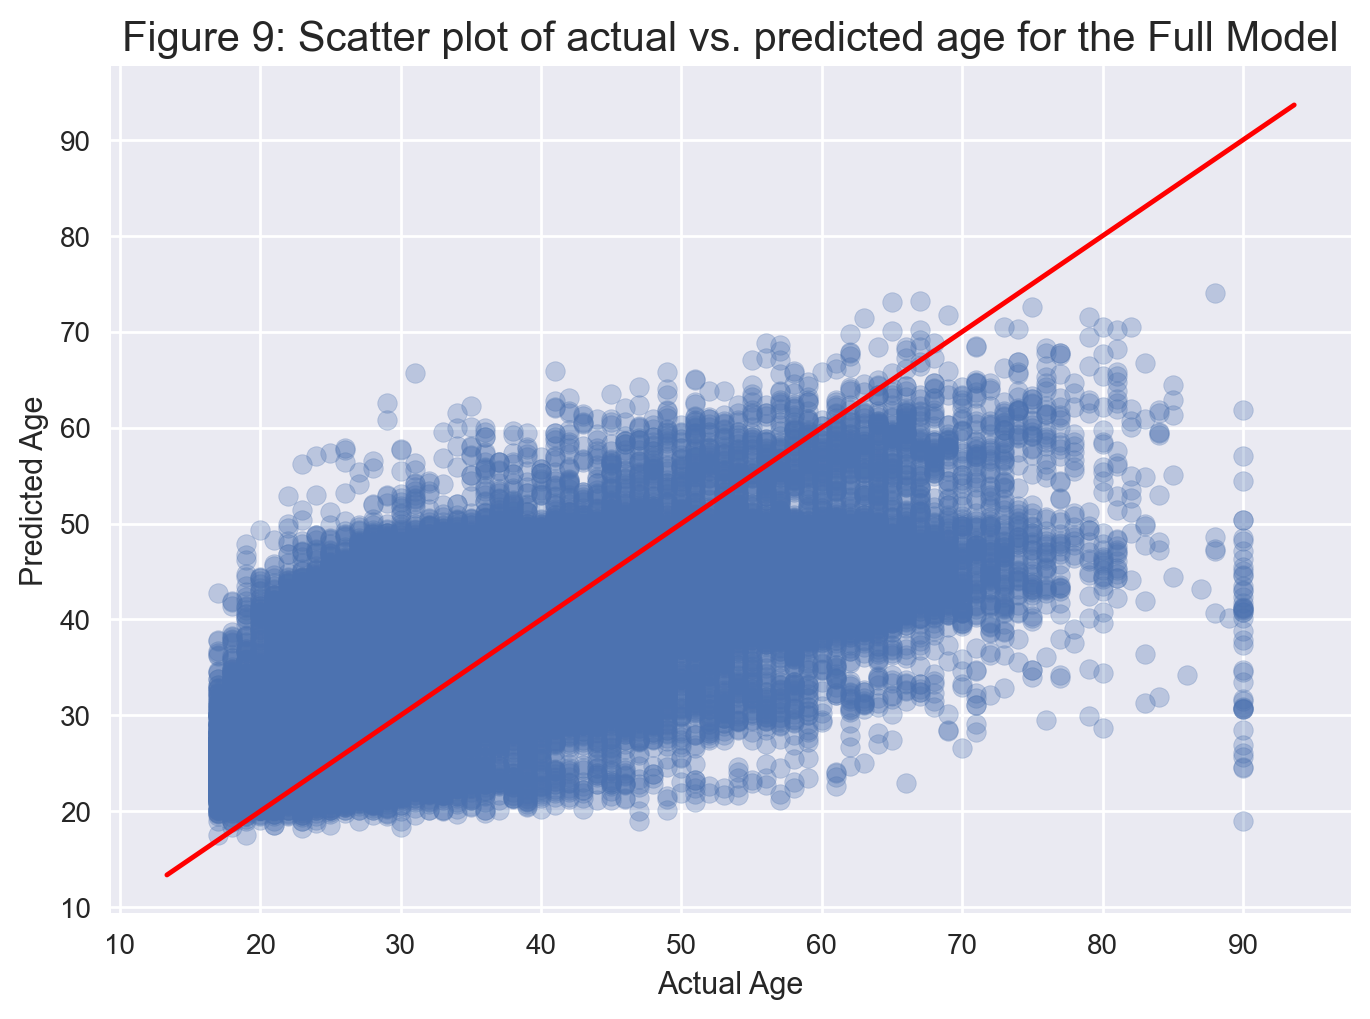

In [34]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Age');
plt.ylabel('Predicted Age');
plt.title('Figure 9: Scatter plot of actual vs. predicted age for the Full Model', fontsize=15);
plt.show();

From Figure 9, we observe that the model never produces a prediction
above 80 even though the oldest person in the dataset is 90.

We will now check the diagnostics for the full model.

### Full Model Diagnostic Checks<a href="#Full-Model-Diagnostic-Checks" class="anchor-link"></a>

We would like to check whether there are indications of violations of
the regression assumptions, which are

1.  linearity of the relationship between target variable and the
    independent variables
2.  constant variance of the errors
3.  normality of the residual distribution
4.  statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted
`age`).

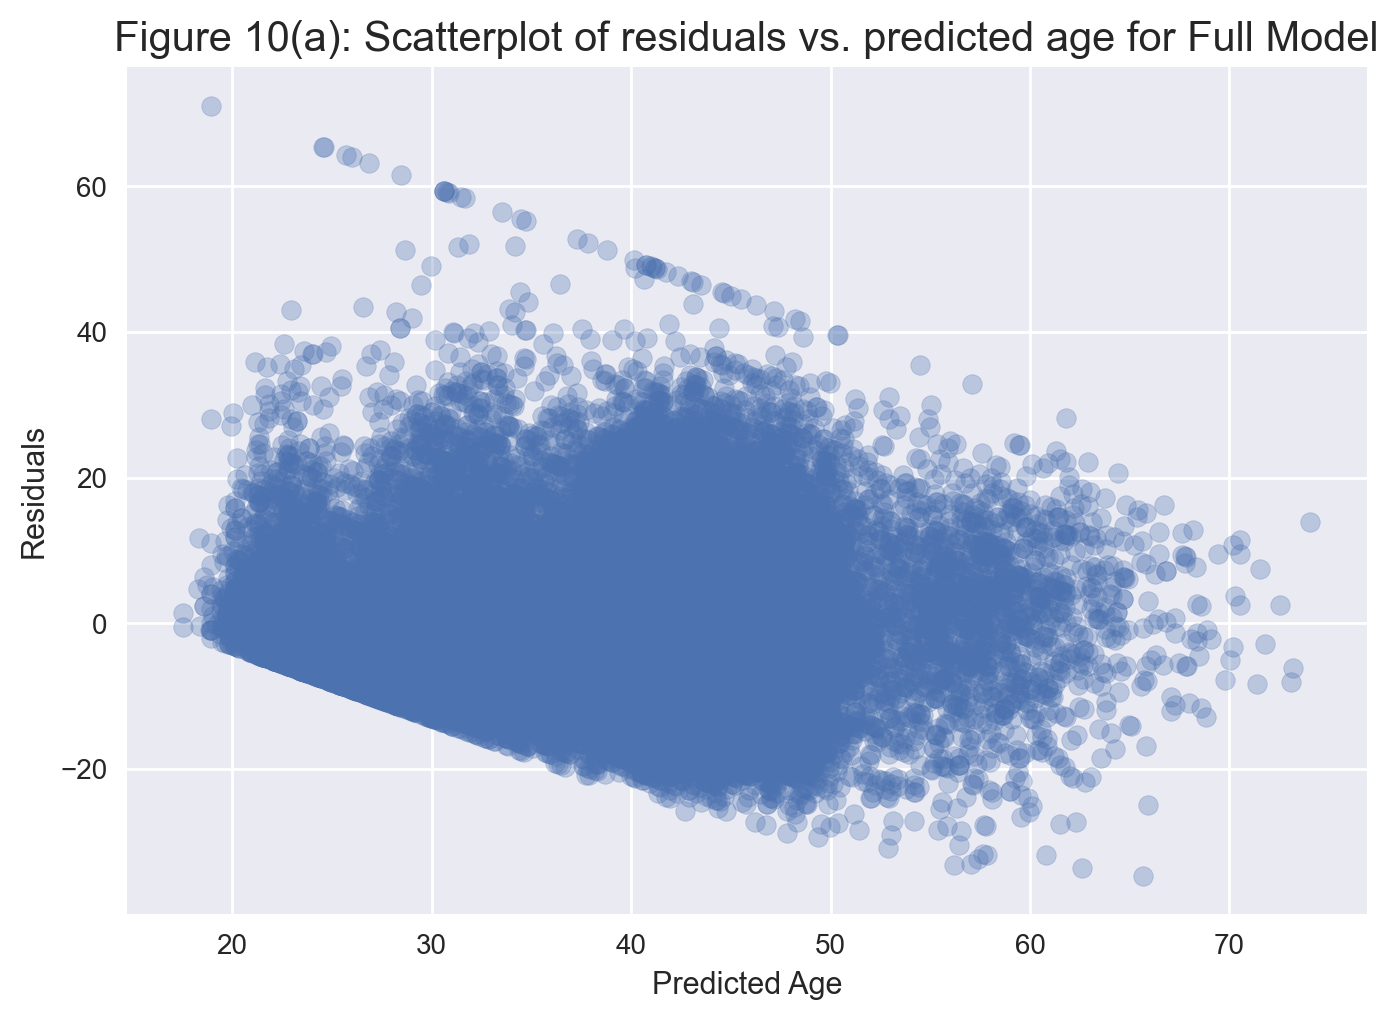

In [35]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Age');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted age for Full Model', fontsize=15)
plt.show();

From Figure 10(a), we see that, rather than being mostly random and
centered around 0, the residuals exhibit a banding pattern, especially
when predicted age is below 50. This pattern indicates that the constant
variability assumption of linear regression is not quite satisfied in
this case.

Let's now plot actual age vs. residuals.

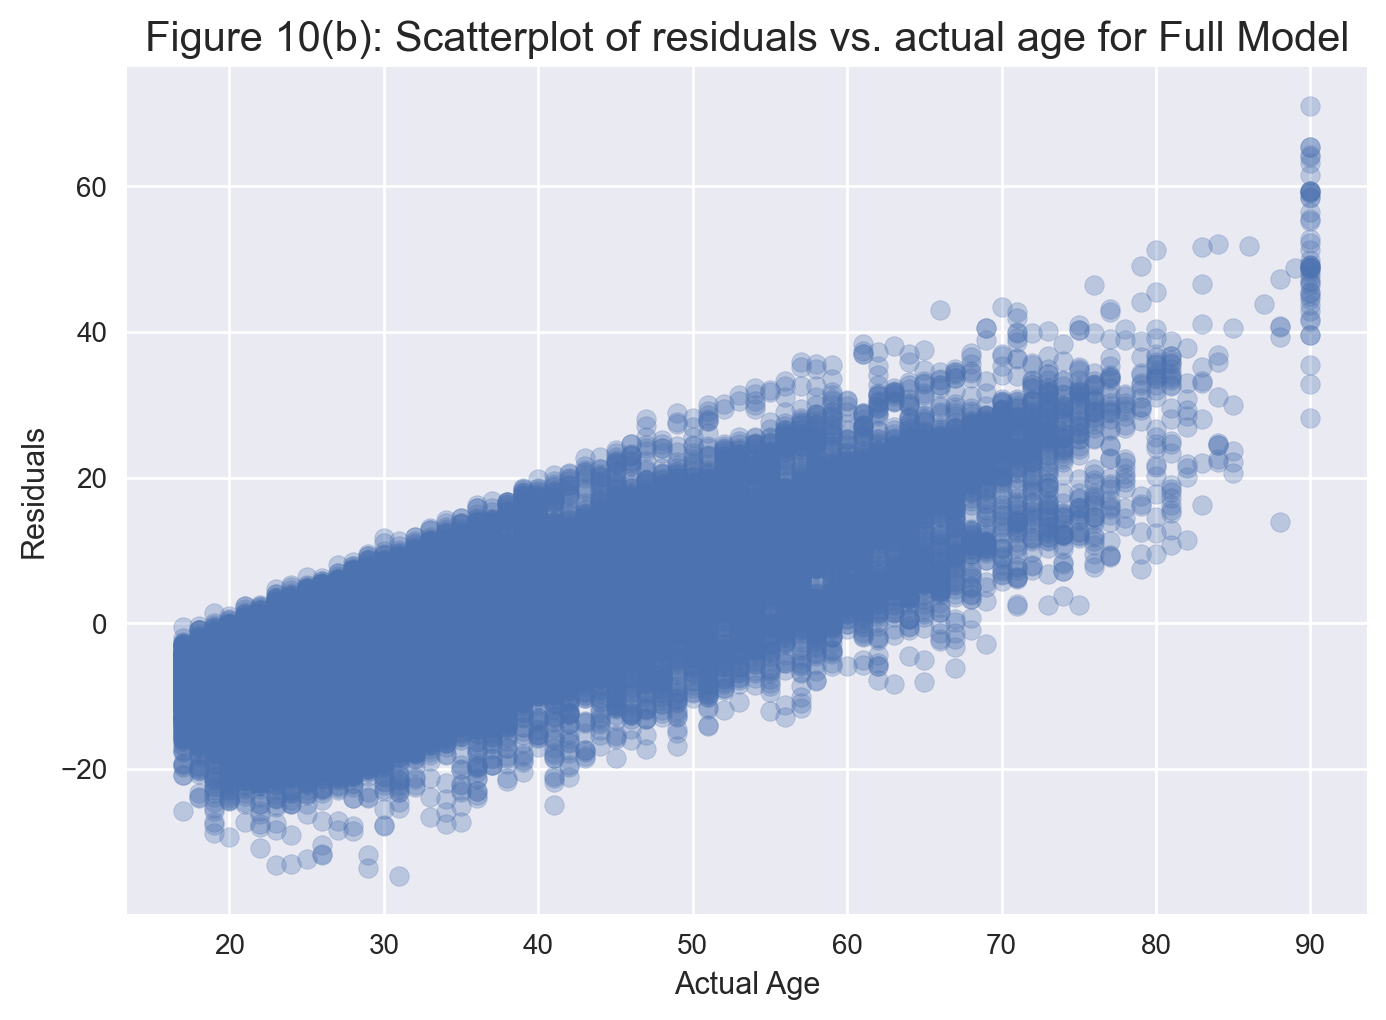

In [36]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Age');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual age for Full Model', fontsize=15)
plt.show();

We notice that the model overestimates younger ages and underestimates
older ages. In particular, for those younger than the age of 30, the
model predicts much older ages. Also, for those above the age of 80, the
model predicts significantly younger ages.

Let's overlay the histograms of actual vs. predicted age on the same
plot.

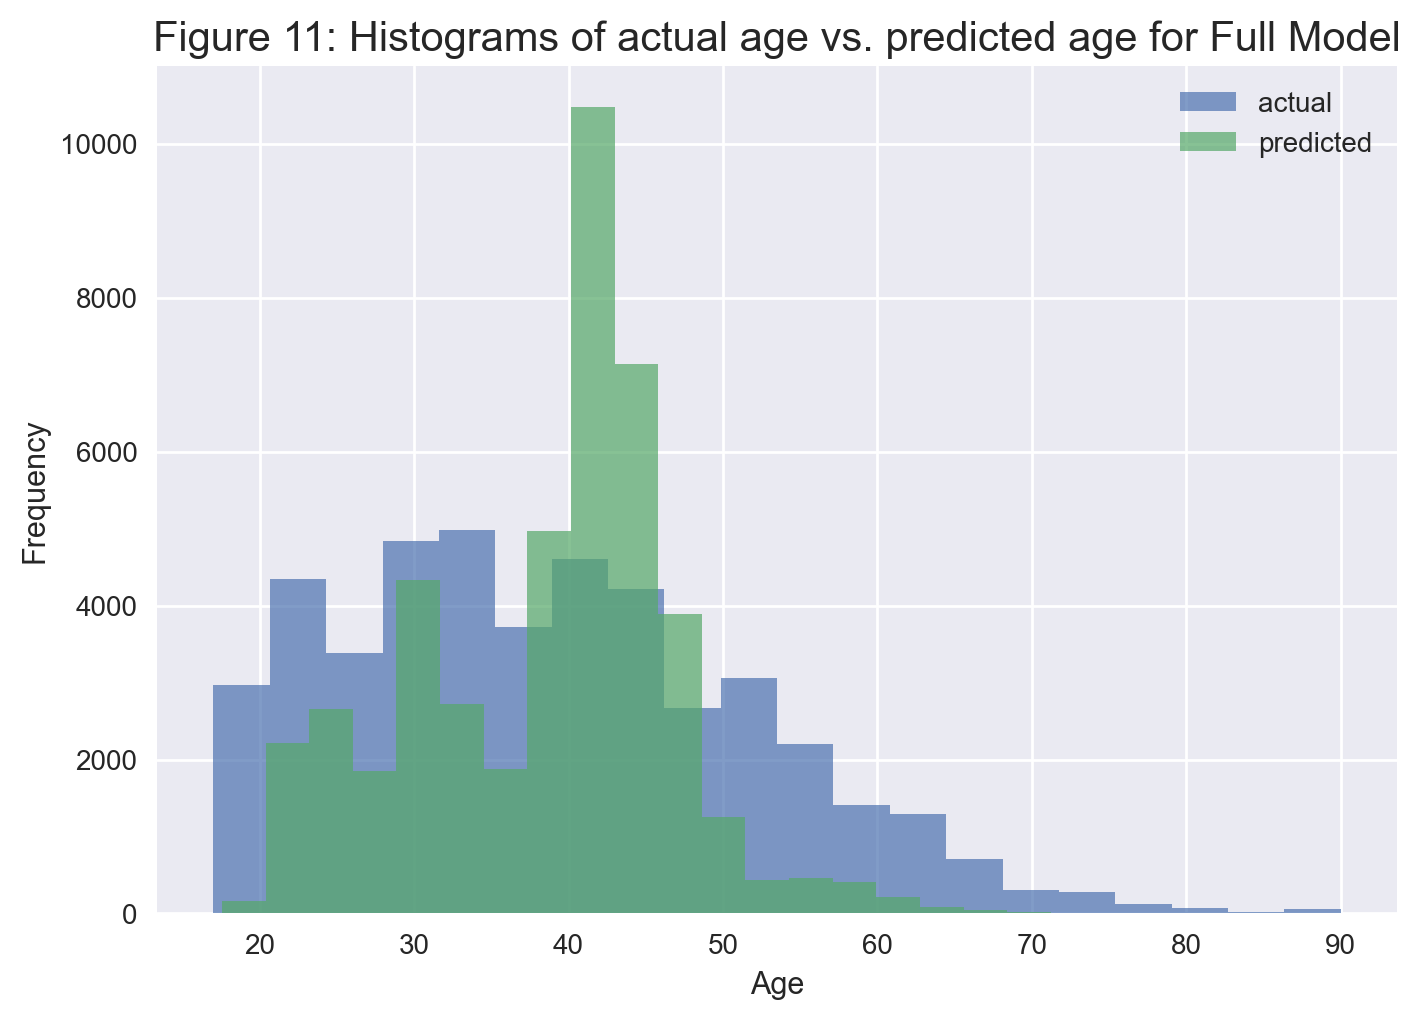

In [37]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual age vs. predicted age for Full Model', fontsize=15);
plt.legend()
plt.show();

We notice that their distributions are quite different. In particular,
the model's predictions are highly clustered around mid-40's.

Let's now have look at the histogram of the residuals.

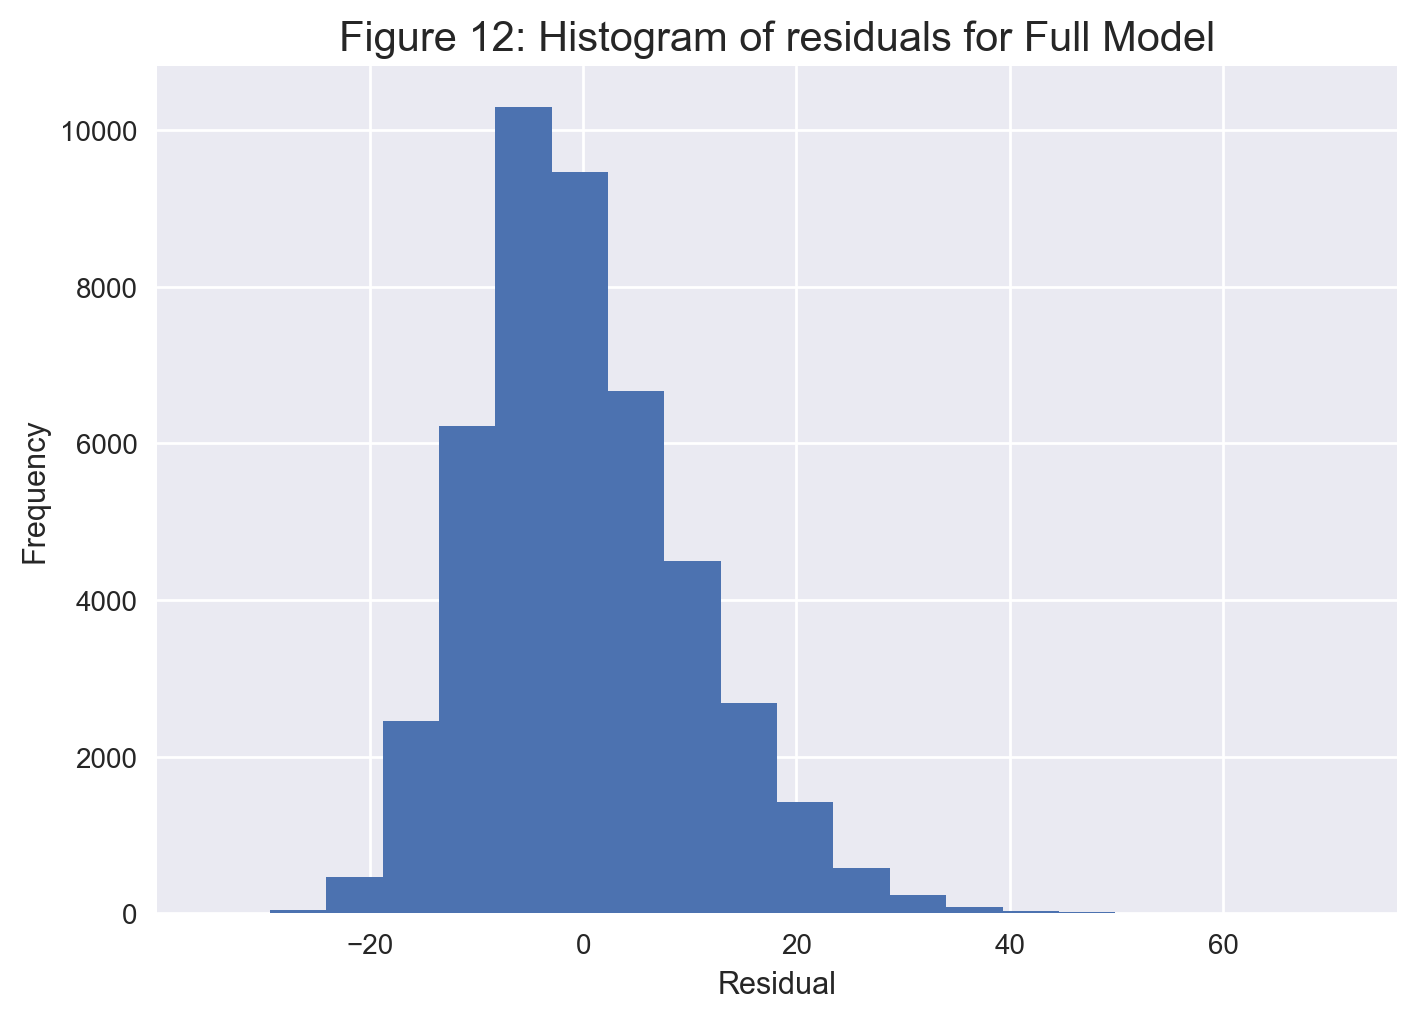

In [38]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 12, the histogram of residuals looks somewhat symmetric,
though slightly right-skewed. Nonetheless, it seems the normality
assumption of linear regression is not significantly violated in this
particular case.

### Backwards Feature Selection<a href="#Backwards-Feature-Selection" class="anchor-link"></a>

We now perform backwards feature selection using p-values. It appears
`Statsmodels` does not have any canned code for automatic feature
selection, so we wrote one ourselves.

In [39]:
formula_string_encoded

'age ~ hours_per_week + capital + workclass_Local_gov + workclass_Private + workclass_Self_emp_inc + workclass_Self_emp_not_inc + workclass_State_gov + workclass_Without_pay + education_11th + education_12th + education_1st_4th + education_5th_6th + education_7th_8th + education_9th + education_Assoc_acdm + education_Assoc_voc + education_Bachelors + education_Doctorate + education_HS_grad + education_Masters + education_Preschool + education_Prof_school + education_Some_college + marital_status_Married_AF_spouse + marital_status_Married_civ_spouse + marital_status_Married_spouse_absent + marital_status_Never_married + marital_status_Separated + marital_status_Widowed + occupation_Armed_Forces + occupation_Craft_repair + occupation_Exec_managerial + occupation_Farming_fishing + occupation_Handlers_cleaners + occupation_Machine_op_inspct + occupation_Other_service + occupation_Priv_house_serv + occupation_Prof_specialty + occupation_Protective_serv + occupation_Sales + occupation_Tech_s

In [40]:
import re

## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    # ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
        
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')

    term_components = term.split(':')

    if (len(term_components) == 1): ## this is a main effect term

        term_to_remove = re.sub(r'\[.*?\]', '', term_components[0])
        
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_to_remove)]))    


    else: ## this is an interaction term
        
        term_to_remove1 = re.sub(r'\[.*?\]', '', term_components[0])
        term_to_remove2 = re.sub(r'\[.*?\]', '', term_components[1])

        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_to_remove1), 
                                                          patsy.EvalFactor(term_to_remove2)]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()

#########
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
#########

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "occupation_Farming_fishing[T.True]" with p-value 0.984

Removing term "occupation_Transport_moving[T.True]" with p-value 0.3774

Removing term "education_Prof_school[T.True]" with p-value 0.3591

Removing term "sex_Male[T.True]" with p-value 0.2642

Removing term "race_White[T.True]:capital" with p-value 0.1615

Removing term "workclass_Local_gov[T.True]" with p-value 0.09358

***
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     642.5
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:54:44   Log-Likelihood:            -1.6914e+05
No. Observations:               45222   AIC:                         3

Similar to what we did for the full model, let's define a new data frame
for actual age vs. predicted age and the residuals for the reduced
model.

In [41]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['age'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

actual  predicted   residual
0      39  32.690335   6.309665
1      50  49.461020   0.538980
2      38  41.558042  -3.558042
3      53  37.655981  15.344019
4      28  36.062133  -8.062133
5      37  40.504922  -3.504922
6      49  44.397983   4.602017
7      52  49.654315   2.345685
8      31  35.544969  -4.544969
9      42  44.329267  -2.329267

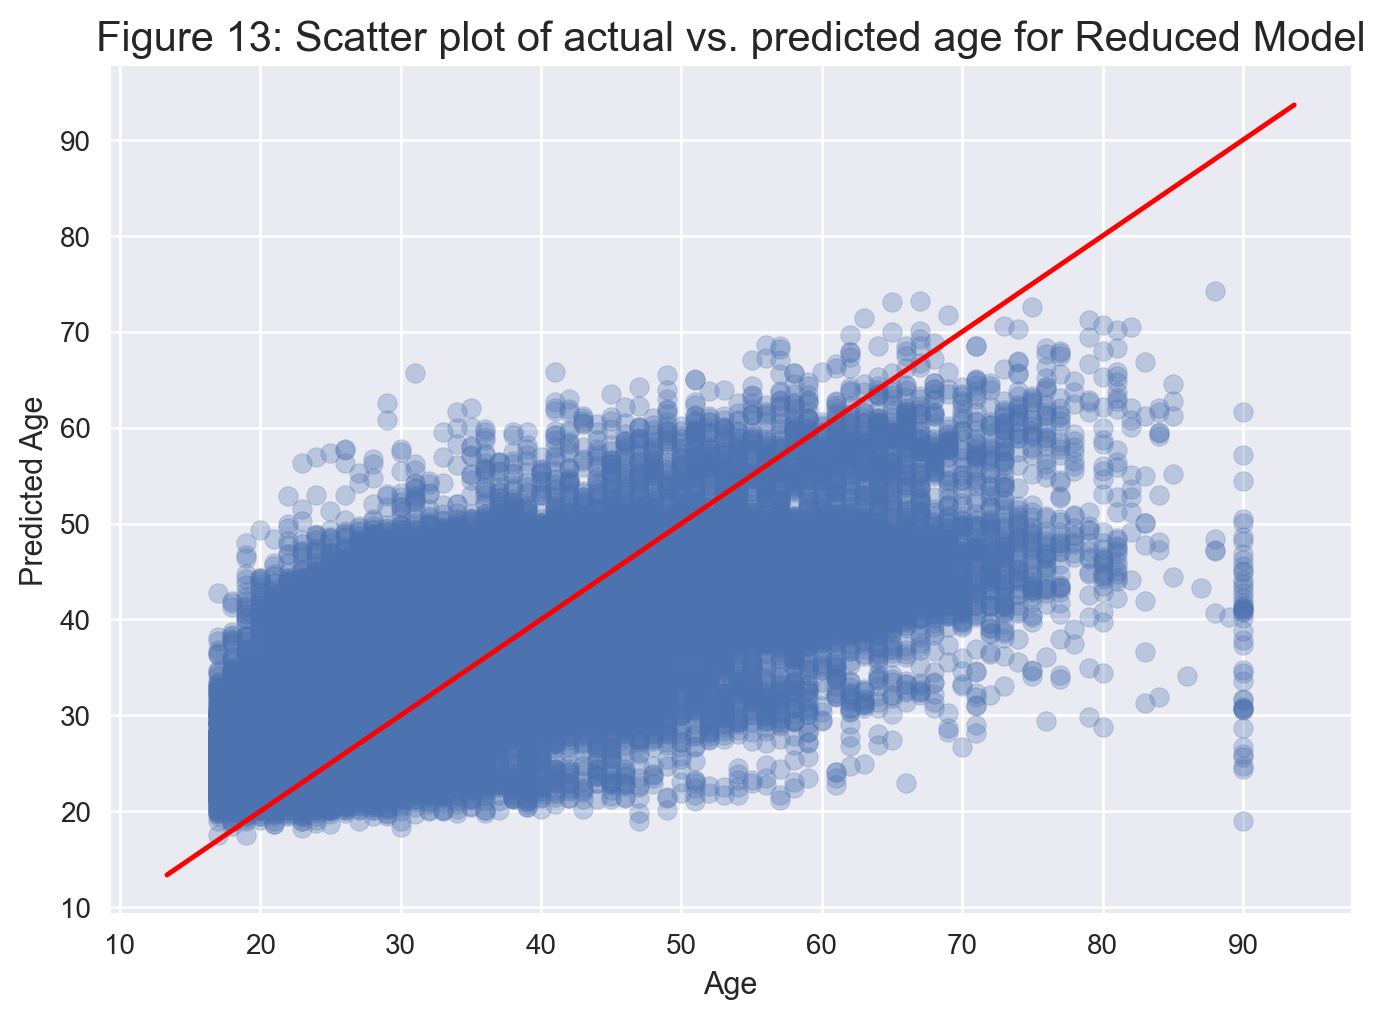

In [42]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Age');
plt.ylabel('Predicted Age');
plt.title('Figure 13: Scatter plot of actual vs. predicted age for Reduced Model', fontsize=15);
plt.show(); 

This model returns an Adjusted R-squared of 0.404, meaning the reduced
model still explains about 40% of the variance, but with 6 less
variables. Looking at the p-values, they are all significant at the 5%
level, as expected. From Figure 13, we still have the same issues with
our model. That is, the model overestimates younger ages and
underestimates older ages. We will now perform the diagnostic checks on
this reduced model.

### Reduced Model Diagnostic Checks<a href="#Reduced-Model-Diagnostic-Checks" class="anchor-link"></a>

Let's first get a scatter plot of residuals (as a function of predicted
age).

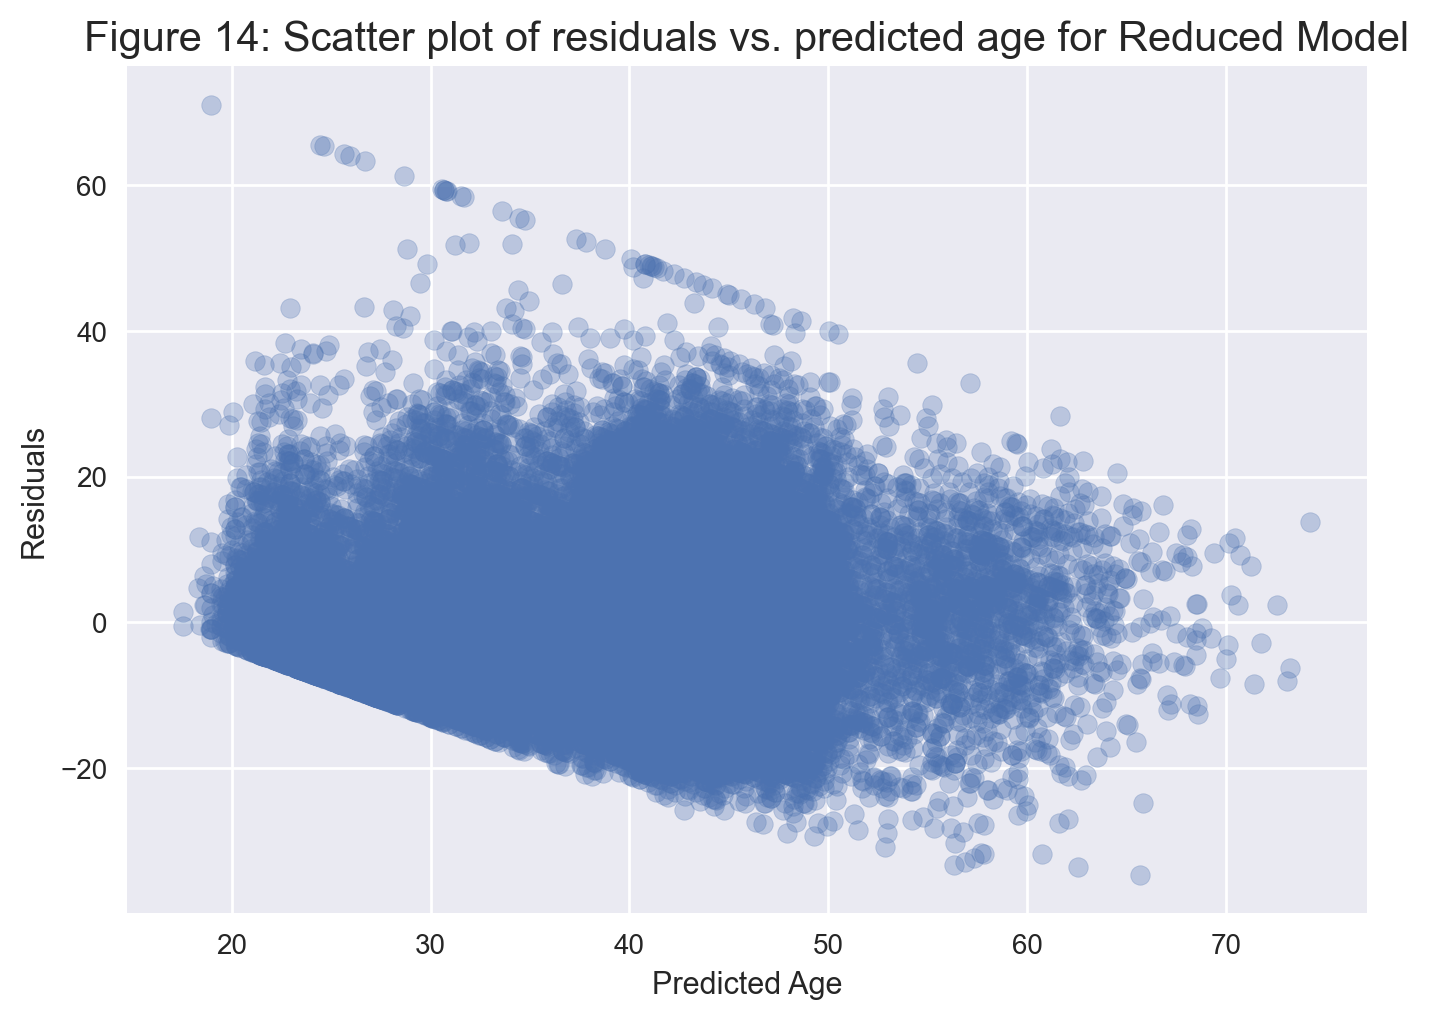

In [43]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Age');
plt.ylabel('Residuals')
plt.title('Figure 14: Scatter plot of residuals vs. predicted age for Reduced Model', fontsize=15)
plt.show();

Figure 14 looks very similar to Figure 10(a), suggesting that the
residuals exhibit the same banding pattern.

Let's now have look at the histogram of the residuals for the reduced
model.

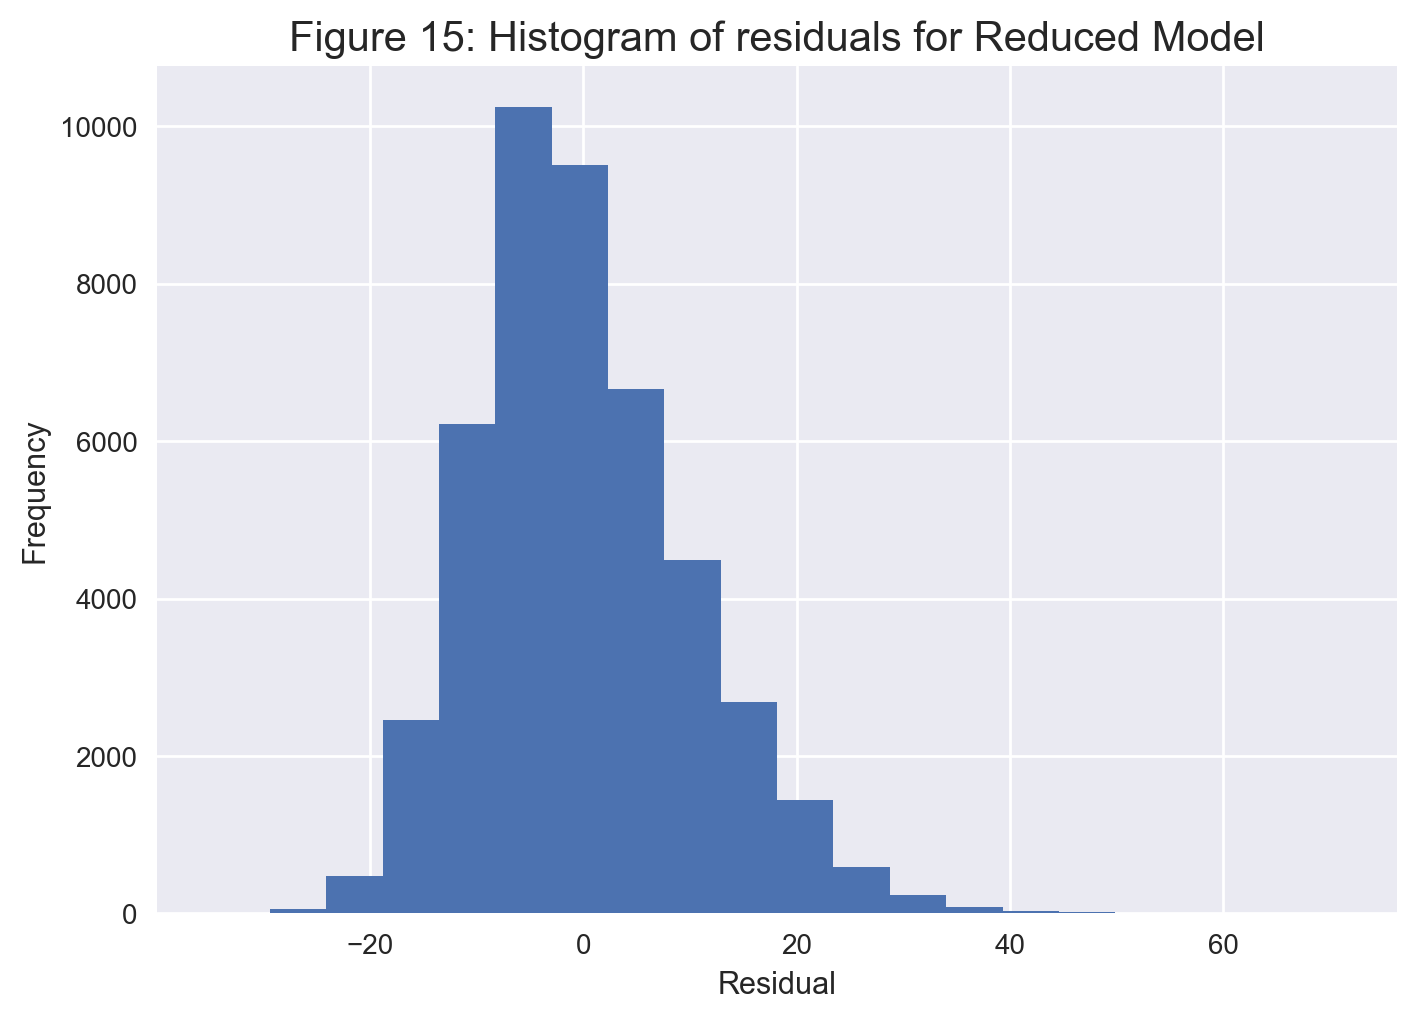

In [44]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 15, there is again a somewhat symmetric histogram around
zero, which suggests that the residuals are somewhat normally
distributed.

## Summary and Conclusions<a href="#Summary-and-Conclusions" class="anchor-link"></a>

Using our independent variables, we were able to get a full model with
an Adjusted R-squared value of about 40%. After backwards variable
selection with a p-value cutoff value of 0.05, we were able to maintain
the same performance but with 6 less variables. Our final model has 49
variables all together with a model p-value of 0.

Diagnostic checks with residual scatter plots indicate that, rather than
being random and centered around 0, the residuals exhibit a banding
pattern, especially when predicted age is below 50. This pattern
indicates that the constant variability assumption of linear regression
is not quite satisfied in this case. On the other hand, residual
histograms suggest that there are no significant violations of the
normality assumption on the residuals.

The final multiple linear regression model has an Adjusted R-squared
value of about 40%, which is pretty low. So, it appears that the
variables we used are not quite adequate for accurately predicting the
age of an individual in the 1994 US Census dataset within a multiple
linear regression framework. A good next step might involve adding some
more interaction terms and maybe some other higher order terms to see if
this would result in some improvement for the Adjusted R-squared value.
Nonetheless, it might be the case that nonlinear models such as a neural
network might be more appropriate for the task at hand rather than a
linear regression model.

Our regression model appears to predict age correctly within \$\\pm40\$
years in general, though this is clearly a huge margin of error for the
model to be useful for any practical purposes. Furthermore, our model
has some rather significant issues. Specifically, our model consistently
overestimates younger ages and underestimates older ages. In particular,
for those younger than the age of 30, the model predicts much older
ages. Also, for those above the age of 80, the model predicts
significantly younger ages.

## References<a href="#References" class="anchor-link"></a>

-   Lichman, M. (2013). UCI Machine Learning Repository \[online\].
    Available at <https://archive.ics.uci.edu/ml/datasets/adult>
    \[Accessed 2022-10-07\]

***